In [1]:
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing
import numpy as np
from keras.utils import to_categorical

%matplotlib inline

In [2]:
class_names = ['Infected', 'Uninfected']

In [3]:
width = 96
height = 96

In [4]:
import os
import random
from glob import glob
from keras import preprocessing

In [5]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.png')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [6]:
images_type_1 = load_images('./data/images_type_1')
images_type_2 = load_images('./data/images_type_2')

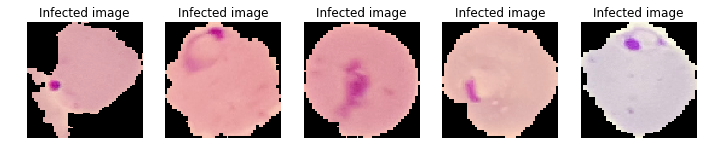

In [7]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

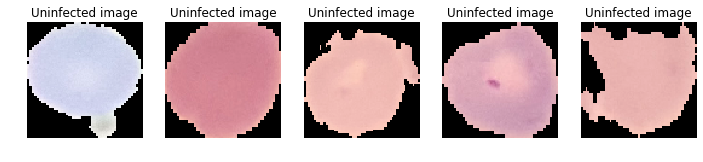

In [8]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

In [9]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)


print(X_type_1.shape)
print(X_type_2.shape)

(13779, 96, 96, 3)
(13779, 96, 96, 3)


In [11]:
X = np.concatenate((X_type_1, X_type_2), axis=0)

In [12]:
X = X / 255.

X.shape

(27558, 96, 96, 3)

In [13]:
from keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]

y = np.concatenate((y_type_1, y_type_2), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(27558, 2)


In [14]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [16]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [17]:
epochs = 10

In [18]:
model.fit(X, y, epochs=epochs)

Epoch 1/10
862/862 [==============================] - 721s 836ms/step - loss: 0.3998 - accuracy: 0.8150
Epoch 2/10
862/862 [==============================] - 692s 803ms/step - loss: 0.1949 - accuracy: 0.9381
Epoch 3/10
862/862 [==============================] - 695s 806ms/step - loss: 0.1768 - accuracy: 0.9446
Epoch 4/10
862/862 [==============================] - 690s 801ms/step - loss: 0.1550 - accuracy: 0.9495
Epoch 5/10
862/862 [==============================] - 695s 806ms/step - loss: 0.1387 - accuracy: 0.9536
Epoch 6/10
862/862 [==============================] - 705s 818ms/step - loss: 0.1223 - accuracy: 0.9563
Epoch 7/10
862/862 [==============================] - 695s 806ms/step - loss: 0.1039 - accuracy: 0.9633
Epoch 8/10
862/862 [==============================] - 698s 810ms/step - loss: 0.0852 - accuracy: 0.9693
Epoch 9/10
862/862 [==============================] - 693s 804ms/step - loss: 0.0639 - accuracy: 0.9777
Epoch 10/10
862/862 [==============================] - 694s 805m

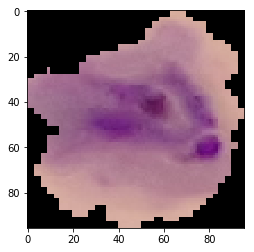

The type predicted is: Infected


In [19]:
type_1 = preprocessing.image.load_img('./data/test1.png',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [21]:
model.save('malariamodel2.h5')